In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from grid_search import *
from costs import *

%load_ext autoreload
%autoreload 2

# Least squares and linear basis functions models
## Least squares

In [4]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square: TODO
    # returns mse, and optimal weights
    # ***************************************************
    transpose = tx.T
    w = np.linalg.solve(np.dot(transpose,tx),np.dot(transpose,y))
    #compute mse
    mse = compute_cost_mse(y,tx,w)
    
    # If we must use the closed form
    #w = np.zeros(tx.shape[1]) #since w has D components
    #w = np.dot(np.linalg.inv(np.dot(transpose,tx)),np.dot(transpose,tx))
    return (mse,w)

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [10]:
from helpers import *

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    mse,w = least_squares(y,tx)
    print("-- With Least Squares : \nMSE = ",mse,"\nw = ",w)
    
    grid_w0, grid_w1 = generate_w(num_intervals=100)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    # Select the best combinaison
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    print("-- With Grid Search : \nMSE = ",loss_star,"\nw = ",[w0_star , w1_star])
    

test_your_least_squares()

-- With Least Squares : 
MSE =  15.3858878688 
w =  [ 73.293922    13.47971243]
-- With Grid Search : 
MSE =  15.5587033686 
w =  [72.72727272727272, 13.636363636363626]


## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [11]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [31]:
def build_poly(x, degree):
    """polynomial basis function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # returns an array of dimension N*degree
    # ***************************************************
    rx = x.reshape((-1,1)) #we want the data to be organised in line (first line xi^0 xi^1 xi^2 ...xi^degree)
    toReturn = np.ones((rx.shape[0],1))
    for i in range(degree):
        toReturn = np.hstack([toReturn,np.power(rx,i+1)])
    return toReturn

#print(build_poly(x,2))

Let us play with polynomial regression. Note that we will use your implemented function `compute_cost`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737467
Processing 3th experiment, degree=7, rmse=0.2496587036090719
Processing 4th experiment, degree=12, rmse=0.24077021773850665


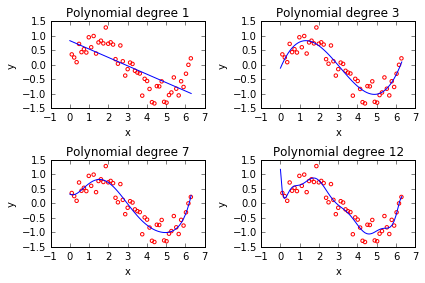

In [37]:
from plots import *

def polynomial_regression():
    """The entry."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        tx = build_poly(x,degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        # ***************************************************
        mse,weight = least_squares(y,tx)
        rmse = np.sqrt(2*mse)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_row][ind % num_row])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [50]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio. ratio in [0;1]"""
    # set seed
    np.random.seed(seed)
    index_array = np.arange(len(x))
    np.random.shuffle(index_array) #shuffles the indices
    bound = np.floor(len(index_array)*ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    #print("Training : [0,",bound-1,"] \t Testing : [",bound,len(y),"]")
    x_training = x[index_array[:bound]]
    y_training = y[index_array[:bound]]
    x_testing = x[index_array[bound:]]
    y_testing = y[index_array[bound:]]
    training = (x_training,y_training)
    testing = (x_testing,y_testing)

    return (training,testing)
    

Then, test your `split_data` function below.

In [51]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    training,testing = split_data(x, y, ratio)
    x_training = training[0]
    y_training = training[1]
    x_testing = testing[0]
    y_testing = testing[1]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tx_training = build_poly(x_training,degree)
    tx_testing = build_poly(x_testing,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    mse_training,weight_training = least_squares(y_training,tx_training)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2*mse_training)
    rmse_te = np.sqrt(2*compute_cost_mse(y_testing,tx_testing,weight_training))
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)
        
# ***************************************************
# proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.214
# proportion=0.5, degree=3, Training RMSE=0.237, Testing RMSE=0.306
# proportion=0.1, degree=3, Training RMSE=0.111, Testing RMSE=0.674
# 
# proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.621
# proportion=0.5, degree=1, Training RMSE=0.400, Testing RMSE=0.553
# proportion=0.1, degree=1, Training RMSE=0.453, Testing RMSE=0.748
# 
# proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.189
# proportion=0.5, degree=7, Training RMSE=0.218, Testing RMSE=0.336
# proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=3.364
# 
# proportion=0.9, degree=12, Training RMSE=0.250, Testing RMSE=0.737
# proportion=0.5, degree=12, Training RMSE=0.216, Testing RMSE=0.423
# proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.854
# ***************************************************

proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.621
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.214
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.189
proportion=0.9, degree=12, Training RMSE=0.250, Testing RMSE=0.737
proportion=0.5, degree=1, Training RMSE=0.400, Testing RMSE=0.553
proportion=0.5, degree=3, Training RMSE=0.237, Testing RMSE=0.306
proportion=0.5, degree=7, Training RMSE=0.218, Testing RMSE=0.336
proportion=0.5, degree=12, Training RMSE=0.216, Testing RMSE=0.423
proportion=0.1, degree=1, Training RMSE=0.453, Testing RMSE=0.748
proportion=0.1, degree=3, Training RMSE=0.111, Testing RMSE=0.674
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=3.364
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.854


/Users/hugomoreau/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/hugomoreau/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/hugomoreau/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/hugomoreau/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


# Ridge Regression
Please fill in the function below.

In [53]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    transpose = tx.T
    lambdaIden = lamb*np.eye(tx.shape[1])
    LHS = np.dot(transpose,tx)+lambdaIden
    RHS = np.dot(transpose,y)
    beta = np.linalg.solve(LHS,RHS)
    return beta


def test_your_ridge_regression():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    mse,w = least_squares(y,tx)
    print("-- With Least Squares : \nw = ",w)
    print("-- With Ridge : \nw = ",ridge_regression(y,tx,0))
    


[  1.00000000e-03   2.78255940e-03   7.74263683e-03   2.15443469e-02
   5.99484250e-02   1.66810054e-01   4.64158883e-01   1.29154967e+00
   3.59381366e+00   1.00000000e+01]


In [57]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10)    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    training,testing = split_data(x, y, ratio)
    x_training = training[0]
    y_training = training[1]
    x_testing = testing[0]
    y_testing = testing[1]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tx_training = build_poly(x_training,degree)
    tx_testing = build_poly(x_testing,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    # ***************************************************
    for lamb in lambdas:
        weight_training = ridge_regression(y_training, tx_training, lamb)
        rmse_tr = np.sqrt(2*compute_cost_mse(y_training,tx_training,weight_training))
        rmse_te = np.sqrt(2*compute_cost_mse(y_testing,tx_testing,weight_training))
        print("lambda={p:.10f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=lamb, tr=rmse_tr, te=rmse_te))

seed = 6
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

lambda=0.0010000000, Training RMSE=0.222, Testing RMSE=0.319
lambda=0.0027825594, Training RMSE=0.225, Testing RMSE=0.322
lambda=0.0077426368, Training RMSE=0.227, Testing RMSE=0.326
lambda=0.0215443469, Training RMSE=0.227, Testing RMSE=0.328
lambda=0.0599484250, Training RMSE=0.228, Testing RMSE=0.330
lambda=0.1668100537, Training RMSE=0.229, Testing RMSE=0.327
lambda=0.4641588834, Training RMSE=0.230, Testing RMSE=0.315
lambda=1.2915496650, Training RMSE=0.235, Testing RMSE=0.289
lambda=3.5938136638, Training RMSE=0.253, Testing RMSE=0.266
lambda=10.0000000000, Training RMSE=0.299, Testing RMSE=0.296


/Users/hugomoreau/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/hugomoreau/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/hugomoreau/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/hugomoreau/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
